<a href="https://colab.research.google.com/github/Raghunandan1234/CNN/blob/main/Dogs_vs_cats_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "raghunandan234" # username from the json file
os.environ['KAGGLE_KEY'] = "6cda51226f961ca311cd2c7478f84bcb" # Provide your key from the json file
!kaggle competitions download -c dogs-vs-cats


100% 810M/812M [00:35<00:00, 25.0MB/s]
100% 812M/812M [00:35<00:00, 23.8MB/s]


In [8]:
from zipfile import ZipFile

file_name = "/content/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


done


In [4]:
from zipfile import ZipFile
zip=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip.extractall('/content')
zip.close()

NameError: ignored

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:55<00:00, 20.9MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.5MB/s]


In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout




In [15]:
 t=keras.utils.image_dataset_from_directory(directory='/content/train',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))

Found 20000 files belonging to 2 classes.


In [14]:
v=keras.utils.image_dataset_from_directory(directory='/content/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))

Found 5000 files belonging to 2 classes.


In [18]:
def process(image,label):
  im=tf.cast(image/255,tf.float32)
  return image,label
train=t.map(process)
validation=v.map(process)

In [28]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
h=model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 1.2853 - accuracy: 0.6154 - val_loss: 0.5899 - val_accuracy: 0.7002
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5170 - accuracy: 0.7453 - val_loss: 0.4881 - val_accuracy: 0.7658
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4235 - accuracy: 0.8019 - val_loss: 0.6172 - val_accuracy: 0.7380
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3543 - accuracy: 0.8435 - val_loss: 0.5361 - val_accuracy: 0.7620
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3281 - accuracy: 0.8658 - val_loss: 0.8131 - val_accuracy: 0.7226
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2337 - accuracy: 0.9028 - val_loss: 0.5703 - val_accuracy: 0.7740
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1604 - accuracy: 0.9373 - val_loss: 1.1929 - val_ac

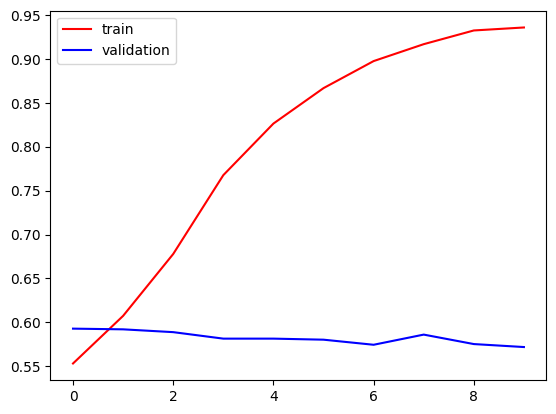

In [24]:
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'],color='red',label='train')
plt.plot(h.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

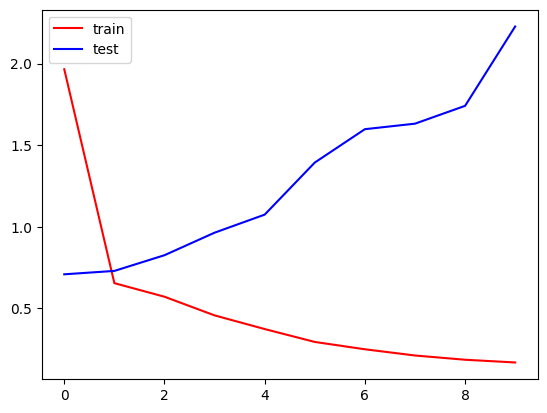

In [25]:
plt.plot(h.history['loss'],color='red',label='train')
plt.plot(h.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

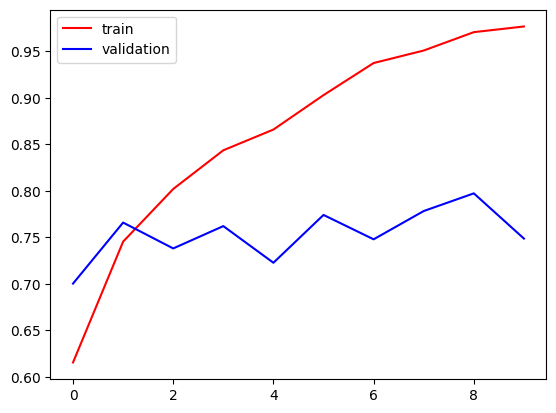

In [31]:
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'],color='red',label='train')
plt.plot(h.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

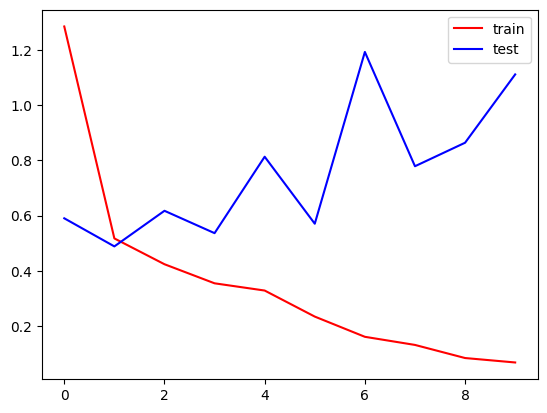

In [32]:
plt.plot(h.history['loss'],color='red',label='train')
plt.plot(h.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [33]:
import cv2

In [35]:
im=cv2.imread('/content/dog.jpg')

In [36]:
im.shape

(150, 150, 3)

In [37]:
im=cv2.resize(im,(256,256))

In [38]:
test_input=im.reshape((1,256,256,3))

In [40]:
model.predict(im)

InvalidArgumentError: ignored